In [1]:
import struct
import numpy as np
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.linear_model import LinearRegression

Load the MNIST data into memory.

In [2]:
with gzip.open('../Datasets/train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('../Datasets/train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))

with gzip.open('../Datasets/t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('../Datasets/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

Visualize a sample of the data.

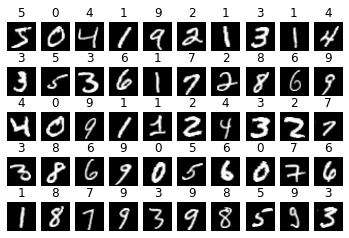

In [7]:
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X=img[i], cmap='gray')
    plt.title(f'{labels[i]}')
    plt.axis('off')
plt.show()

Construct a linear classifier model to classify the digits 0 and 1. The model we are going to create is to determine whether the samples are either the digits 0 or 1. To do this, we first need to select only those samples.

In [11]:
sample = np.where((labels == 0) | (labels == 1))
img_01 = img[sample]
labels_01 = labels[sample]

sample_test = np.where((labels_test == 0) | (labels_test == 1))
img_test_01 = img_test[sample_test]
labels_test_01 = labels_test[sample_test]

Visualize the selected information with images of one sample of 0 and one sample of 1.

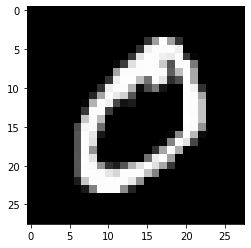

In [18]:
plt.subplot(1,1,1)
plt.imshow(img_01[0], cmap='gray')
plt.show()

In [15]:
model = LinearRegression()
model.fit(img_01.reshape(-1, rows * cols), labels_01)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Determine the accuracy against the training set.

In [19]:
model.score(img_01.reshape(-1, rows * cols), labels_01)

0.9705731670264529

Determine the label predictions for each of the training samples, using a threshold of 0.5. Values greater than 0.5 classify as 1; values less than, or equal to, 0.5 classify as 0.

In [28]:
y_pred = model.predict(img_01.reshape(-1, rows * cols))
print(y_pred)
label_pred = (y_pred > 0.5).astype(int)
print(label_pred)

[0.07074671 1.04256224 1.02997936 ... 0.98914204 0.07167269 0.91966454]
[0 1 1 ... 1 0 1]


Compute the classification accuracy of the predicted training values versus the ground truth.

In [29]:
np.sum(label_pred == labels_01) / len(labels_01)

0.9947887879984209

Compare the performance against the test set.

In [30]:
y_test_pred = model.predict(img_test_01.reshape(-1, rows * cols))
print(y_test_pred)
label_test_pred = (y_test_pred > 0.5).astype(int)
print(label_test_pred)

[0.98747149 0.02664647 1.00282638 ... 1.0427241  0.24918483 1.02362423]
[1 0 1 ... 1 0 1]


In [31]:
np.sum(label_test_pred == labels_test_01) / len(labels_test_01)

0.9929078014184397